In [1]:
import json
import csv
import pandas as pd

In [2]:
job_text = pd.read_json("job_data.json")

In [3]:
job_text.head()

,company,text,title
0,None,"[Summary, \nThe CRM Analyst will work closely ...",CRM Analyst
1,RD Digital Solutions,"[Job Description, Role - , Python Developer, W...",Python Developer
2,None,"[Responsibilities, · Analyze and organize raw ...",Data Engineer - ENTRY LEVEL
3,None,[Aplomb technologies is hiring for python Deve...,Python Developer
4,None,"[Responsibilities:, Developing and managing bu...",Business Intelligence Analyst - entry level


In [4]:
job_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 3 columns):
company    741 non-null object
text       1596 non-null object
title      1567 non-null object
dtypes: object(3)
memory usage: 37.5+ KB


In [5]:
job_text["text"] = job_text["text"].str.join(" ")

In [6]:
job_text["text"]

0       Summary \nThe CRM Analyst will work closely wi...
1       Job Description Role -  Python Developer W2 op...
2       Responsibilities · Analyze and organize raw da...
3       Aplomb technologies is hiring for python Devel...
4       Responsibilities: Developing and managing busi...
5       Qualifications 4-year degree from a respected ...
6       Bachelor's degree 5 years experience building ...
7       Remote, United States \nTalent and Recruiting ...
8       Note: By applying to this position you will ha...
9       Note: Google’s hybrid workplace includes remot...
10      As a Python Software Engineering Teaching Assi...
11      A little about ADP: THINGS YOU'LL DO: EXPERIEN...
12      Trainee, Deloitte Cyber Career Accelerator Pro...
13      Accenture Flex  offers you the flexibility of ...
14      The Helper Bees (THB) was created to fill an o...
15      Looking for a Software Engineer with a passion...
16      The recruitment team at Myticas Consulting is ...
17      Marath

In [7]:
job_text.duplicated().sum()

193

In [8]:
job_text["duplicated"] = job_text.duplicated()

In [9]:
job_text[job_text["duplicated"] == True].head(50)

,company,text,title,duplicated
72,None,,None,True
203,None,,None,True
204,None,,None,True
216,None,,None,True
305,None,,None,True
375,None,,None,True
391,None,,None,True
492,None,,None,True
506,None,,None,True
522,None,,None,True


In [10]:
job_text.drop("duplicated", axis=1, inplace=True)

In [11]:
job_text

,company,text,title
0,None,Summary \nThe CRM Analyst will work closely wi...,CRM Analyst
1,RD Digital Solutions,Job Description Role - Python Developer W2 op...,Python Developer
2,None,Responsibilities · Analyze and organize raw da...,Data Engineer - ENTRY LEVEL
3,None,Aplomb technologies is hiring for python Devel...,Python Developer
4,None,Responsibilities: Developing and managing busi...,Business Intelligence Analyst - entry level
5,Emonics,Qualifications 4-year degree from a respected ...,Entry Level Python Developer
6,Canyon Associates,Bachelor's degree 5 years experience building ...,Python Developer
7,None,"Remote, United States \nTalent and Recruiting ...",People Analytics Partner
8,None,Note: By applying to this position you will ha...,"Associate, YouTube"
9,None,Note: Google’s hybrid workplace includes remot...,Employee Relations Analyst


In [12]:
job_text.drop_duplicates(inplace=True)

In [13]:
job_text

,company,text,title
0,None,Summary \nThe CRM Analyst will work closely wi...,CRM Analyst
1,RD Digital Solutions,Job Description Role - Python Developer W2 op...,Python Developer
2,None,Responsibilities · Analyze and organize raw da...,Data Engineer - ENTRY LEVEL
3,None,Aplomb technologies is hiring for python Devel...,Python Developer
4,None,Responsibilities: Developing and managing busi...,Business Intelligence Analyst - entry level
5,Emonics,Qualifications 4-year degree from a respected ...,Entry Level Python Developer
6,Canyon Associates,Bachelor's degree 5 years experience building ...,Python Developer
7,None,"Remote, United States \nTalent and Recruiting ...",People Analytics Partner
8,None,Note: By applying to this position you will ha...,"Associate, YouTube"
9,None,Note: Google’s hybrid workplace includes remot...,Employee Relations Analyst


In [14]:
job_text[job_text["company"].isna() == True].count()

company      0
text       759
title      758
dtype: int64

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [16]:
docs = list(nlp.pipe(job_text.text))

In [17]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - ' + ent.label_+ ' - '+str(spacy.explain(ent.label_)))
    else:
        print("No named entities found.")

In [18]:
show_ents(docs[1])

6+ years - DATE - Absolute or relative dates or periods
Java - PERSON - People, including fictional
Python - ORG - Companies, agencies, institutions, etc.
AWS - ORG - Companies, agencies, institutions, etc.
Lambdas - ORG - Companies, agencies, institutions, etc.
AWS - ORG - Companies, agencies, institutions, etc.
Agile Dev - PERSON - People, including fictional
Jenkins - ORG - Companies, agencies, institutions, etc.
Cicd - ORG - Companies, agencies, institutions, etc.
Documentation Practices - PERSON - People, including fictional
Cloud - GPE - Countries, cities, states
Google - ORG - Companies, agencies, institutions, etc.
AWS - ORG - Companies, agencies, institutions, etc.
Presto - GPE - Countries, cities, states
Nice - GPE - Countries, cities, states
AWS Knowledge - ORG - Companies, agencies, institutions, etc.
Development Practices - ORG - Companies, agencies, institutions, etc.
6+ month - DATE - Absolute or relative dates or periods
ASAP - Coding - ORG - Companies, agencies, instit

In [19]:
show_ents(docs[34])

H1B - GPE - Countries, cities, states
CPT - ORG - Companies, agencies, institutions, etc.
OPT Visa Candidates - ORG - Companies, agencies, institutions, etc.
W2 Contract Position (Authorized - ORG - Companies, agencies, institutions, etc.
the USA) Requirements - ORG - Companies, agencies, institutions, etc.
Bachelor - PERSON - People, including fictional
three years - DATE - Absolute or relative dates or periods
At least 4 years - DATE - Absolute or relative dates or periods
Information Technology - ORG - Companies, agencies, institutions, etc.
Python Memory Management - ORG - Companies, agencies, institutions, etc.
GIL) Sounds Knowledge of Software - ORG - Companies, agencies, institutions, etc.
Data - ORG - Companies, agencies, institutions, etc.
Collection Benefits Competitive - ORG - Companies, agencies, institutions, etc.
H1B - MONEY - Monetary values, including unit
Skill Enhancement Opportunity - ORG - Companies, agencies, institutions, etc.
Fortune 500 Companies Job Types - ORG

In [20]:
show_ents(docs[34])

H1B - GPE - Countries, cities, states
CPT - ORG - Companies, agencies, institutions, etc.
OPT Visa Candidates - ORG - Companies, agencies, institutions, etc.
W2 Contract Position (Authorized - ORG - Companies, agencies, institutions, etc.
the USA) Requirements - ORG - Companies, agencies, institutions, etc.
Bachelor - PERSON - People, including fictional
three years - DATE - Absolute or relative dates or periods
At least 4 years - DATE - Absolute or relative dates or periods
Information Technology - ORG - Companies, agencies, institutions, etc.
Python Memory Management - ORG - Companies, agencies, institutions, etc.
GIL) Sounds Knowledge of Software - ORG - Companies, agencies, institutions, etc.
Data - ORG - Companies, agencies, institutions, etc.
Collection Benefits Competitive - ORG - Companies, agencies, institutions, etc.
H1B - MONEY - Monetary values, including unit
Skill Enhancement Opportunity - ORG - Companies, agencies, institutions, etc.
Fortune 500 Companies Job Types - ORG

In [21]:
show_ents(docs[34])

H1B - GPE - Countries, cities, states
CPT - ORG - Companies, agencies, institutions, etc.
OPT Visa Candidates - ORG - Companies, agencies, institutions, etc.
W2 Contract Position (Authorized - ORG - Companies, agencies, institutions, etc.
the USA) Requirements - ORG - Companies, agencies, institutions, etc.
Bachelor - PERSON - People, including fictional
three years - DATE - Absolute or relative dates or periods
At least 4 years - DATE - Absolute or relative dates or periods
Information Technology - ORG - Companies, agencies, institutions, etc.
Python Memory Management - ORG - Companies, agencies, institutions, etc.
GIL) Sounds Knowledge of Software - ORG - Companies, agencies, institutions, etc.
Data - ORG - Companies, agencies, institutions, etc.
Collection Benefits Competitive - ORG - Companies, agencies, institutions, etc.
H1B - MONEY - Monetary values, including unit
Skill Enhancement Opportunity - ORG - Companies, agencies, institutions, etc.
Fortune 500 Companies Job Types - ORG

In [22]:
def get_ents(doc):
    if doc.ents:
        return [ent.text for ent in doc.ents]
    else:
        pass

In [23]:
from pandas.core.common import flatten


In [25]:
ents = pd.Series(list(flatten([get_ents(doc) for doc in docs])))

In [26]:
entity_counts = ents.value_counts()

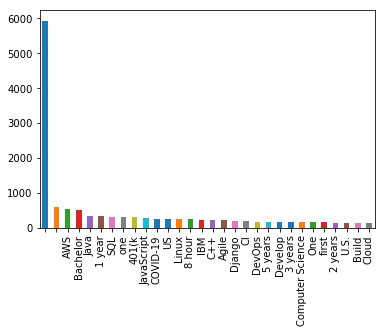

In [27]:
entity_counts[:30].plot(kind="bar");

In [28]:
docs[100]

An associate business analyst will review the process requirements by communicating with the clients or users. He helps in the documentation of client requirements which makes it easy for the product developers to go ahead with a business plan or designing and developing a product. Job description Responsibilities: · Provides plan with data, reporting and analyses that enable data driven decision making. · Provides summary analyses in written and oral presentation settings. · Builds database from scratch. And prepares complex presentations. · Develops system test cases and documents results, researches system issues and documents findings. Requirements: _ Understanding of database objects (entities, attributes, constraints, relationships, joins, etc.) Good logic-building skills Ability to write DDL/DML/DQL (any RDBMS) queries Good technical presentation & delivery skills Exposure to any programming language (C, C++, VB, Python, R, etc.) Ability to translate business requirements into n

In [29]:
show_ents(docs[100])

Provides - NORP - Nationalities or religious or political groups
Provides - NORP - Nationalities or religious or political groups
Builds - PERSON - People, including fictional
Understanding - PERSON - People, including fictional
DDL - ORG - Companies, agencies, institutions, etc.
RDBMS - ORG - Companies, agencies, institutions, etc.
Exposure - ORG - Companies, agencies, institutions, etc.
C++ - NORP - Nationalities or religious or political groups
VB - ORG - Companies, agencies, institutions, etc.
BI - ORG - Companies, agencies, institutions, etc.
PowerBI - NORP - Nationalities or religious or political groups
Tableau - PERSON - People, including fictional
SQL Server - FAC - Buildings, airports, highways, bridges, etc.
Snowflake - ORG - Companies, agencies, institutions, etc.
MS Azure Education - ORG - Companies, agencies, institutions, etc.
Bachelor - PERSON - People, including fictional
Science, Technology, Engineering - ORG - Companies, agencies, institutions, etc.
COVID-19 Job Type

In [30]:
entity_counts.tail(50)

Chick-fil-                                                                    1
Subversion (SVN)                                                              1
cPanel                                                                        1
the Export Administration Regulations                                         1
Equal Opportunity Statement \n                                                1
NJ 08817                                                                      1
IOS Services                                                                  1
Education/Degree/Certifications Verification, Social Security Number Trace    1
1k                                                                            1
\n Responsibilities                                                           1
Provide after hours                                                           1
IDS/                                                                          1
Next.js                                 

In [31]:
entity_counts.head(50)

\n                           5936
                              580
AWS                           525
Bachelor                      514
Java                          346
1 year                        325
SQL                           314
one                           313
401(k                         297
JavaScript                    273
COVID-19                      257
US                            255
Linux                         244
8 hour                        242
IBM                           222
C++                           211
Agile                         207
Django                        189
CI                            179
DevOps                        175
5 years                       171
Develop                       170
3 years                       167
Computer Science              154
One                           153
first                         149
2 years                       148
U.S.                          147
Build                         146
Cloud         

In [37]:
import re

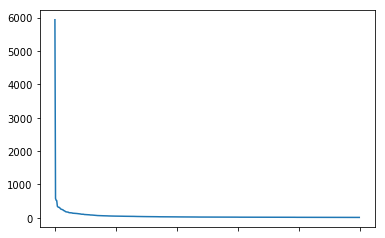

In [38]:
entity_counts[:500].plot();

In [39]:
job_text.text.str.findall('PYTHON', flags=re.IGNORECASE)

0                                               [Python]
1       [Python, Python, Python, Python, Python, Python]
2                                               [Python]
3                                               [python]
4                                               [Python]
5                                                     []
6                                                     []
7                                               [Python]
8                                               [Python]
9                                               [Python]
10                                              [Python]
11                                                    []
12                                              [Python]
13                                      [Python, Python]
14                              [Python, Python, Python]
15                                              [python]
16                                              [python]
17                             

In [56]:
job_text.text.str.count('python', flags=re.IGNORECASE).sum()

2596

In [65]:
job_text.text.str.count('JavaScript', flags=re.IGNORECASE).sum()

591

In [162]:
def count_skills(pattern, flags=re.IGNORECASE):
    try:
        skill_count = {'Skill' : pattern, 'Count' : job_text.text.str.count(pattern, flags).sum()}
    except:
        pass
    else:
        return skill_count

In [163]:
count_skills('Python', flags=re.IGNORECASE)

{'Skill': 'Python', 'Count': 2596}

In [135]:
entity_counts[:50]

\n                           5936
                              580
AWS                           525
Bachelor                      514
Java                          346
1 year                        325
SQL                           314
one                           313
401(k                         297
JavaScript                    273
COVID-19                      257
US                            255
Linux                         244
8 hour                        242
IBM                           222
C++                           211
Agile                         207
Django                        189
CI                            179
DevOps                        175
5 years                       171
Develop                       170
3 years                       167
Computer Science              154
One                           153
first                         149
2 years                       148
U.S.                          147
Build                         146
Cloud         

In [281]:
skill_counts = [count_skills(pattern) for pattern in patterns if count_skills(pattern)]

In [282]:
skill_counts

[{'Skill': 'Python', 'Count': 2596},
 {'Skill': 'SQL', 'Count': 1200},
 {'Skill': 'JavaScript', 'Count': 591},
 {'Skill': 'Java', 'Count': 1161},
 {'Skill': 'AWS', 'Count': 782},
 {'Skill': 'Linux', 'Count': 346},
 {'Skill': 'Agile', 'Count': 575},
 {'Skill': 'Django', 'Count': 265},
 {'Skill': 'DevOps', 'Count': 258},
 {'Skill': 'Cloud', 'Count': 920},
 {'Skill': 'CSS', 'Count': 266},
 {'Skill': 'Docker', 'Count': 215},
 {'Skill': 'Git', 'Count': 793},
 {'Skill': 'ETL', 'Count': 173},
 {'Skill': 'GIS', 'Count': 388},
 {'Skill': 'Tableau', 'Count': 124},
 {'Skill': 'Kubernetes', 'Count': 158},
 {'Skill': 'Cloud', 'Count': 920},
 {'Skill': 'Azure', 'Count': 299},
 {'Skill': 'Jenkins', 'Count': 126},
 {'Skill': 'Ruby', 'Count': 122},
 {'Skill': 'HTML5', 'Count': 95},
 {'Skill': 'Excel', 'Count': 691},
 {'Skill': 'NoSQL', 'Count': 86},
 {'Skill': 'Perl', 'Count': 95},
 {'Skill': 'Hadoop', 'Count': 87},
 {'Skill': 'Angular', 'Count': 183},
 {'Skill': 'Lambda', 'Count': 89},
 {'Skill': 'Ora

In [283]:
skill_counts_frame = pd.Series({skill_count['Skill']: skill_count['Count'] for skill_count in skill_counts })

In [284]:
skill_counts_frame.sort_values(ascending=False, inplace=True)

In [285]:
skill_counts_frame

Python              2596
SQL                 1200
Java                1161
Cloud                920
Git                  793
AWS                  782
Excel                691
JavaScript           591
Agile                575
Scala                407
GIS                  388
Linux                346
React                333
Azure                299
HTML                 297
CSS                  266
Django               265
DevOps               258
Machine Learning     245
Docker               215
HTTP                 210
Angular              183
ETL                  173
MySQL                164
Kubernetes           158
Scrum                156
Spark                137
Jenkins              126
GitHub               126
Flask                125
                    ... 
Lambda                89
Big Data              89
PostgreSQL            88
Hadoop                87
NoSQL                 86
JSON                  77
Bash                  74
Redis                 70
Terraform             66


In [270]:
entity_counts[50:100]

3                                97
3+ years                         96
\nAbility                        93
today                            93
Azure                            92
Jenkins                          91
daily                            91
Software                         88
\n \n                            84
Ruby                             84
HTML5                            83
2+ years                         82
New York                         80
millions                         80
Engineer                         77
Create                           75
Windows                          71
4 years                          69
5                                69
Colorado                         69
USA                              67
Excel                            66
Expert                           66
5+ years                         65
NoSQL                            64
MySQL                            64
NBA                              63
SAS                         

In [207]:
entity_counts[100:150]

Understand                       50
QA                               50
Deloitte                         49
hours                            49
Tuition                          48
                                 48
Health insurance Health          48
Software Developer               47
NY                               47
every day                        47
Redis                            47
#LI-                             46
Jira                             46
Flask                            46
JSON                             46
\n Develop                       45
PostgreSQL                       45
Familiar                         45
BI                               44
\nKnowledge                      44
Kafka                            44
401                              43
Analyze                          43
Terraform                        43
annual                           42
Software Engineer                42
TX                               42
Salesforce                  

In [216]:
entity_counts[150:200]

weekly                 35
tomorrow               35
Data Science           34
Android                34
60.00                  34
2021                   34
NJ                     33
5+                     33
Boston                 33
3rd                    33
Facebook               32
Test                   32
NodeJS                 32
Role                   32
6 years                32
CrowdStrike            32
4                      32
\nFamiliarity          32
CMS                    31
May                    31
Company                30
3+                     30
Chicago                30
billions               30
Referral               30
ML                     30
12 months              29
three                  29
Strong                 29
Healthcare             29
70.00                  29
GIT                    28
UI                     28
Austin                 28
Bash                   28
Amazon Web Services    28
JIRA                   28
React                  28
BS          

In [225]:
entity_counts[200:250]

Application Question(s                    26
4+ years                                  26
Work Location                             26
monthly                                   26
Qualifications                            26
Canada                                    26
PowerShell                                26
Finance                                   26
HTML                                      26
10                                        25
8 years                                   25
four                                      25
Design                                    25
Solid                                     25
IBMer                                     25
Golang                                    24
2020                                      24
Digital                                   24
\n                                        24
\n Familiarity                            24
GitHub                                    24
Visual Studio                             23
Us        

In [226]:
entity_counts[250:300]

New Jersey                21
DynamoDB                  21
Assist                    21
UK                        21
Learn                     21
MD                        21
80.00                     21
12                        21
OOP                       21
Boeing                    21
NVIDIA                    21
\n                        21
RDBMS                     21
C/C++                     21
TypeScript                21
API                       21
SOAP                      21
Annual                    21
Summary                   20
Vanguard                  20
Developer                 20
YouTube                   20
PhD                       20
7 years                   20
New York City             20
Amazon                    20
Visa                      20
LLC                       20
Northrop Grumman          20
Information Technology    20
Confluence                20
America                   20
NC                        20
PowerPoint                19
SAP           

In [227]:
entity_counts[300:350]

Education                        18
\nCollaborate                    18
second                           18
#                                18
ACLU                             18
8                                18
Data Scientists                  18
CO                               18
100,000.00                       18
Informatica                      18
HTTP                             18
Software Development             18
GA                               18
GitLab                           18
Operations                       18
Power BI                         18
SQS                              18
ORM                              18
Creating                         17
Translate                        17
Redshift                         17
Google Cloud                     17
IAM                              17
\n Collaborate                   17
ECS                              17
Web Developer                    17
\n Bachelor's                    17
TN                          

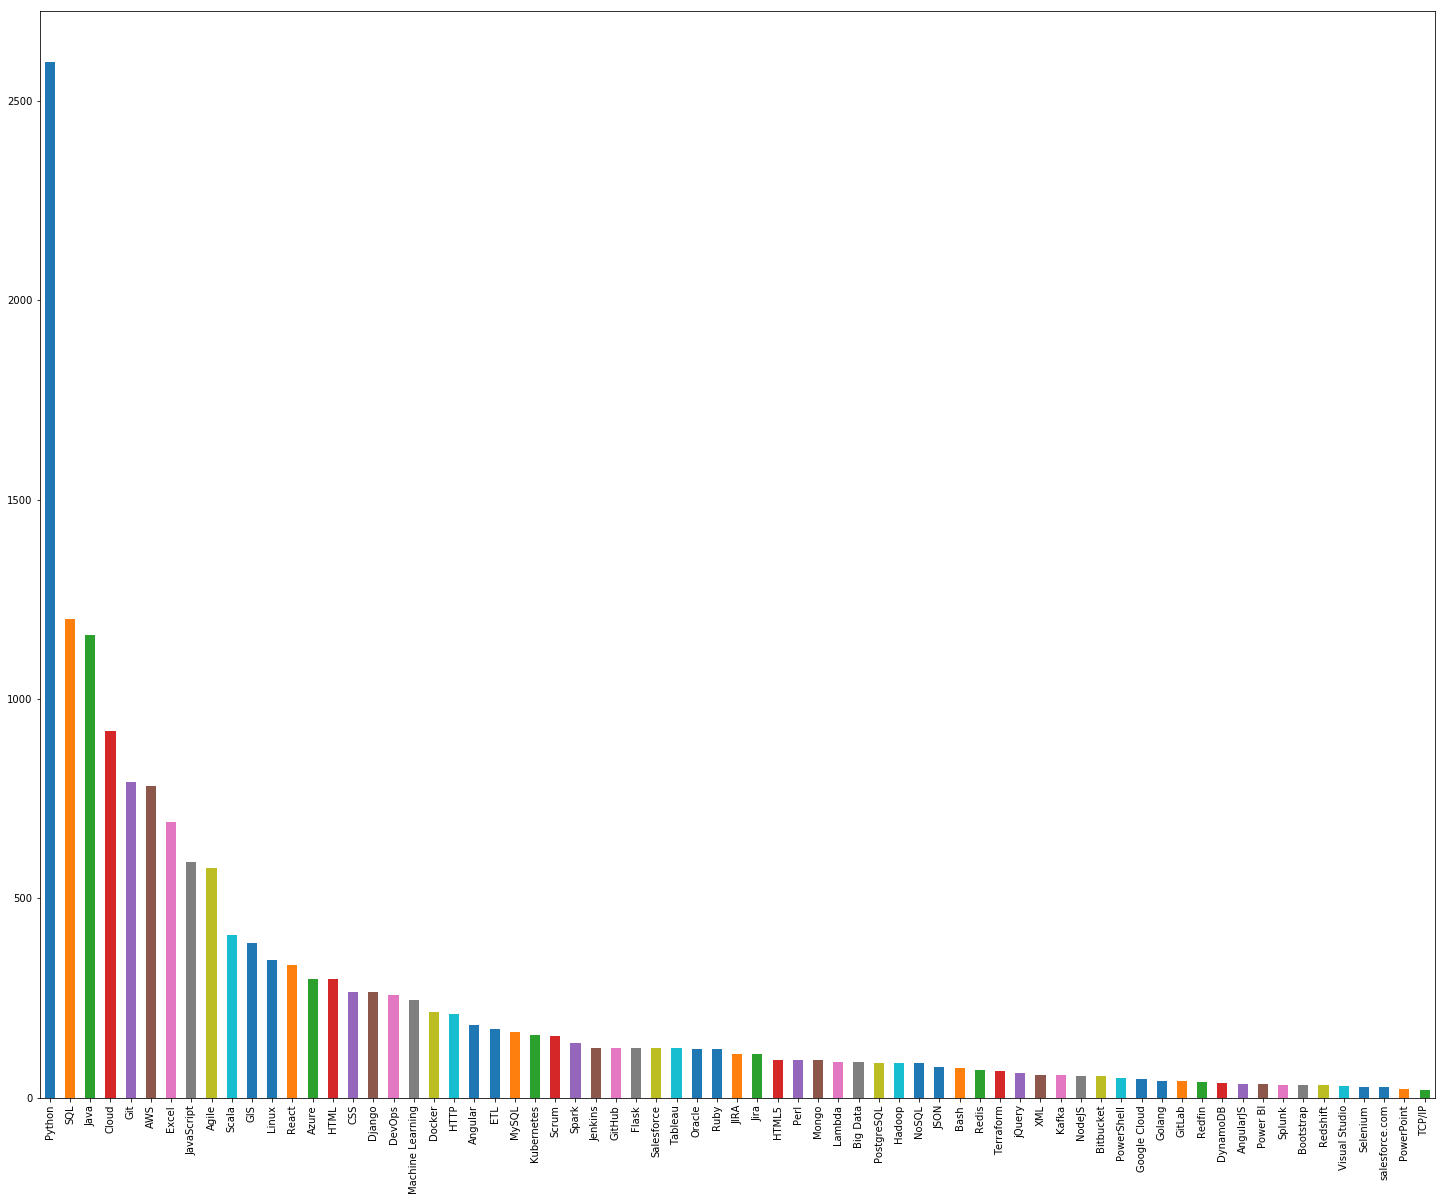

In [286]:
skill_counts_frame.plot(kind='bar', figsize=(25, 20));

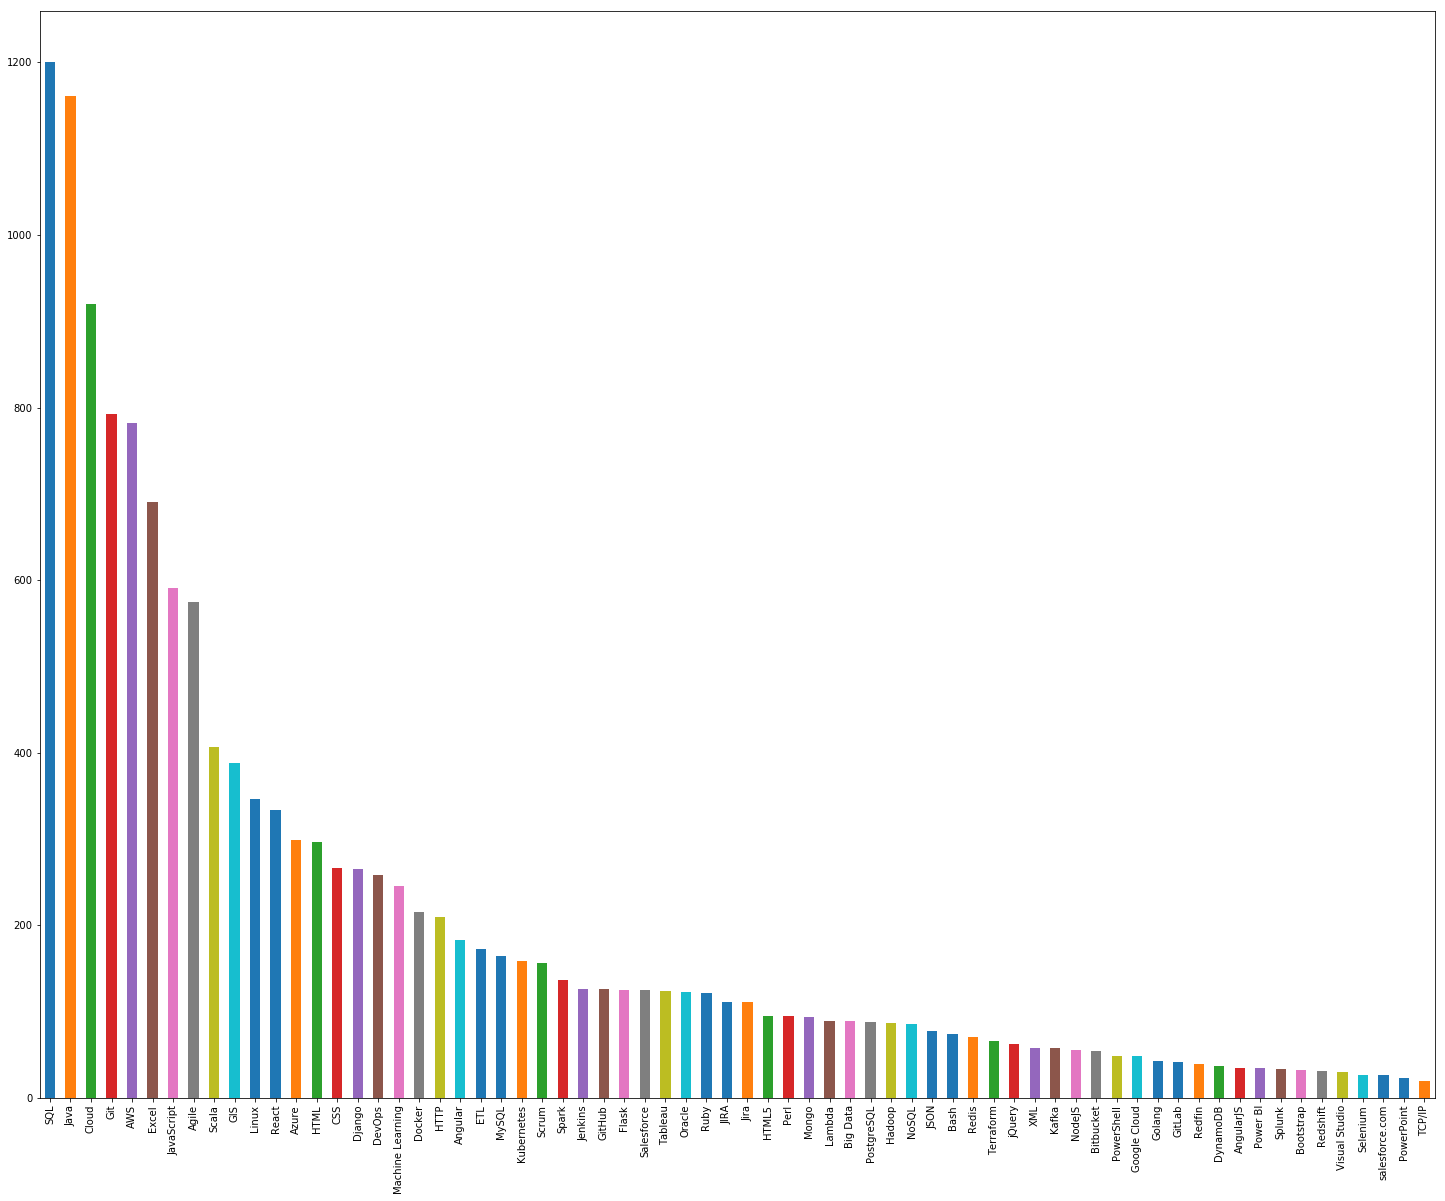

In [287]:
skill_counts_frame[1:].plot(kind='bar', figsize=(25, 20));